#### Importing Libraries

In [1]:
!pip install einops
!pip install "tensorflow-text>=2.11"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

import typing
from typing import Any, Tuple

import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import tensorflow as tf
import tensorflow_text as tf_text
import pathlib
import warnings
warnings.filterwarnings('ignore')

#### Europarl Dataset

In [4]:
path_to_file1 = pathlib.Path('/content/drive/MyDrive/IIITD PGDCSAI Capstone Project/Machine Translation Dataset/europarl-v7_de_en.txt')
path_to_file2 = pathlib.Path('/content/drive/MyDrive/IIITD PGDCSAI Capstone Project/Machine Translation Dataset/europarl-v7_en_de.txt')

In [5]:
lines_de = open(path_to_file1).read().splitlines()
lines_de = pd.DataFrame(lines_de)

In [6]:
lines_en = open(path_to_file2).read().splitlines()
lines_en = pd.DataFrame(lines_en)

In [7]:
# check for duplicates

lines_en.shape, lines_de.shape, lines_en.drop_duplicates().shape, lines_de.drop_duplicates().shape

((1920209, 1), (1920209, 1), (1860118, 1), (1862306, 1))

In [8]:
lines_en = lines_en.reset_index()
lines_de = lines_de.reset_index()

europarl_lines = pd.merge(lines_de, lines_en, on='index')

In [9]:
europarl_lines.rename(columns={'0_x':'German_Text', '0_y':'English_Text'}, inplace=True)
europarl_lines.head(3)

,index,German_Text,English_Text
0,0,Wiederaufnahme der Sitzungsperiode,Resumption of the session
1,1,"Ich erkläre die am Freitag, dem 17. Dezember u...",I declare resumed the session of the European ...
2,2,"Wie Sie feststellen konnten, ist der gefürchte...","Although, as you will have seen, the dreaded '..."


In [10]:
europarl_lines['english_sentence_length'] = europarl_lines['English_Text'].str.split().str.len()
europarl_lines['german_sentence_length'] = europarl_lines['German_Text'].str.split().str.len()

In [11]:
import matplotlib.pyplot
%matplotlib inline

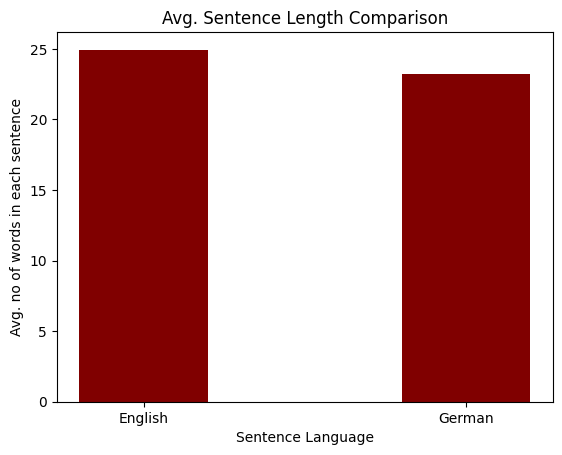

In [12]:
sentence_language = ['English', 'German']
mean_sentence_length = [europarl_lines['english_sentence_length'].mean(), europarl_lines['german_sentence_length'].mean()]

plt.bar(sentence_language, mean_sentence_length, color ='maroon',
        width = 0.4)
 
plt.xlabel("Sentence Language")
plt.ylabel("Avg. no of words in each sentence")
plt.title("Avg. Sentence Length Comparison")
plt.show()

<Axes: >

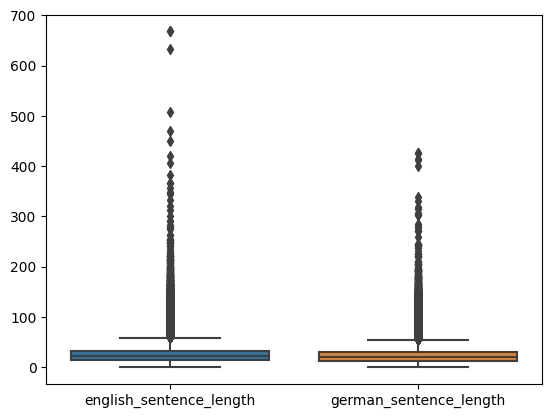

In [13]:
# Word Count Distribution of each sentence

import seaborn as sns
sns.boxplot(data=europarl_lines[['english_sentence_length', 'german_sentence_length']])

#### News Comment Dataset

In [14]:
path_to_file1 = pathlib.Path('/content/drive/MyDrive/IIITD PGDCSAI Capstone Project/Machine Translation Dataset/news-commentary-v9_de_en.txt')
path_to_file2 = pathlib.Path('/content/drive/MyDrive/IIITD PGDCSAI Capstone Project/Machine Translation Dataset/news-commentary-v9_en_de.txt')

In [15]:
lines_de = open(path_to_file1).read().splitlines()
lines_de = pd.DataFrame(lines_de)

In [16]:
lines_en = open(path_to_file2).read().splitlines()
lines_en = pd.DataFrame(lines_en)

In [17]:
lines_en.shape, lines_de.shape, lines_en.drop_duplicates().shape, lines_de.drop_duplicates().shape

((202002, 1), (201854, 1), (200793, 1), (200924, 1))

In [18]:
# remove blank spaces

lines_en[0] = lines_en[0].fillna('').astype(str).str.replace(r'[^A-Za-z ]', '', regex=True)
lines_de[0] = lines_de[0].fillna('').astype(str).str.replace(r'[^A-Za-z ]', '', regex=True)

# lines_en[0] = lines_en[0].str.strip()
# lines_de[0] = lines_de[0].str.strip()

lines_en = lines_en[lines_en[0].str.split().str.len() != 0]
lines_de = lines_de[lines_de[0].str.split().str.len() != 0]

lines_en.reset_index(drop=True, inplace=True)
lines_de.reset_index(drop=True, inplace=True)

# lines_en = lines_en.drop_duplicates()
# lines_de = lines_de.drop_duplicates()

# lines_en.reset_index(drop=True, inplace=True)
# lines_de.reset_index(drop=True, inplace=True)

In [19]:
lines_en.shape, lines_de.shape

((201296, 1), (201222, 1))

In [20]:
lines_en[lines_en[0] == '']

,0


In [21]:
lines_en = lines_en.reset_index()
lines_de = lines_de.reset_index()

news_comment_data = pd.merge(lines_de, lines_en, on='index')

In [22]:
news_comment_data.rename(columns={'0_x':'German_Text', '0_y':'English_Text'}, inplace=True)
news_comment_data.head(3)

,index,German_Text,English_Text
0,0,Steigt Gold auf Dollar,Gold
1,1,SAN FRANCISCO Es war noch nie leicht ein rati...,SAN FRANCISCO It has never been easy to have ...
2,2,In letzter Zeit allerdings ist dies schwierige...,Lately with gold prices up more than over the...


In [23]:
news_comment_data.tail(3)

,index,German_Text,English_Text
201219,201219,In einer Region wo die lteren Menschen sehr ve...,It must insist that all opposition leaders and...
201220,201220,Drei von zehn Sdafrikanern sind jnger als und...,It should dispatch an eminent persons group of...
201221,201221,Irgendwie muss Zuma einen Weg finden einerseit...,The SADCs censure of Mugabe and his regime sho...


In [24]:
news_comment_data['english_sentence_length'] = news_comment_data['English_Text'].str.split().str.len()
news_comment_data['german_sentence_length'] = news_comment_data['German_Text'].str.split().str.len()

In [25]:
import matplotlib.pyplot
%matplotlib inline

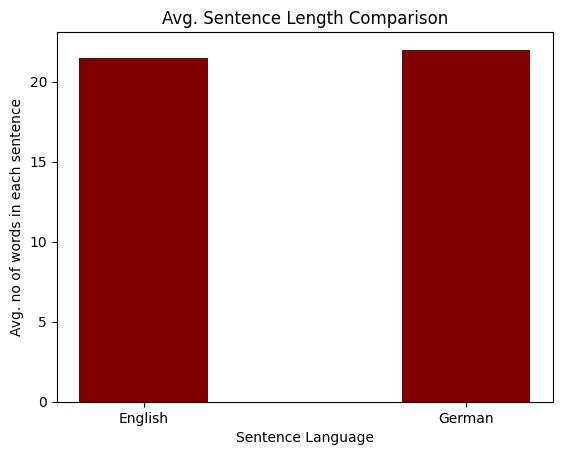

In [26]:
sentence_language = ['English', 'German']
mean_sentence_length = [news_comment_data['english_sentence_length'].mean(), news_comment_data['german_sentence_length'].mean()]

plt.bar(sentence_language, mean_sentence_length, color ='maroon',
        width = 0.4)
 
plt.xlabel("Sentence Language")
plt.ylabel("Avg. no of words in each sentence")
plt.title("Avg. Sentence Length Comparison")
plt.show()

<Axes: >

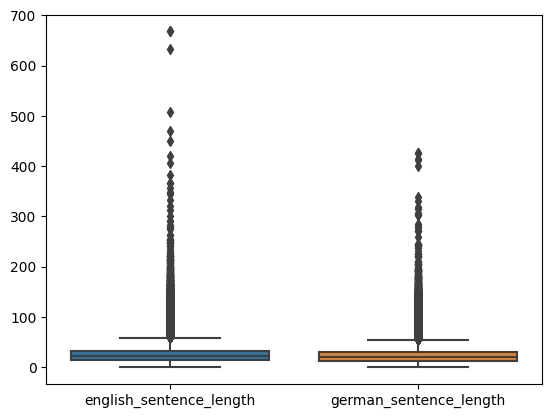

In [27]:
# Word Count Distribution of each sentence

import seaborn as sns
sns.boxplot(data=europarl_lines[['english_sentence_length', 'german_sentence_length']])

Common Crawl Dataset

In [28]:
path_to_file1 = pathlib.Path('/content/drive/MyDrive/IIITD PGDCSAI Capstone Project/Machine Translation Dataset/commoncrawl_de_en.txt')
path_to_file2 = pathlib.Path('/content/drive/MyDrive/IIITD PGDCSAI Capstone Project/Machine Translation Dataset/commoncrawl_en_de.txt')

In [29]:
lines_de = open(path_to_file1).read().splitlines()
lines_de = pd.DataFrame(lines_de)

In [30]:
lines_en = open(path_to_file2).read().splitlines()
lines_en = pd.DataFrame(lines_en)

In [31]:
lines_en.shape, lines_de.shape, lines_en.drop_duplicates().shape, lines_de.drop_duplicates().shape

((2399123, 1), (2399123, 1), (2339917, 1), (2399123, 1))

In [32]:
lines_en = lines_en.reset_index()
lines_de = lines_de.reset_index()

common_crawl_data = pd.merge(lines_de, lines_en, on='index')

In [33]:
common_crawl_data.rename(columns={'0_x':'German_Text', '0_y':'English_Text'}, inplace=True)
common_crawl_data = common_crawl_data.drop_duplicates(subset=['English_Text'])
common_crawl_data.reset_index(drop=True, inplace=True)
common_crawl_data.head(3)

,index,German_Text,English_Text
0,0,"iron cement ist eine gebrauchs-fertige Paste, ...",iron cement is a ready for use paste which is ...
1,1,Nach der Aushärtung schützt iron cement die Ko...,iron cement protects the ingot against the hot...
2,2,feuerfester Reparaturkitt für Feuerungsanlagen...,"a fire restant repair cement for fire places, ..."


In [34]:
common_crawl_data = common_crawl_data[1000:]
common_crawl_data.reset_index(drop=True, inplace=True)
common_crawl_data.head(2)

,index,German_Text,English_Text
0,1028,3 und dies ist für sie das Beispiel: Sie solle...,"3 And this is the a ensample unto them, that t..."
1,1029,"4 Und was auch immer sie, a bewegt vom Heilige...",4 And whatsoever they shall speak when moved u...


In [35]:
common_crawl_data['english_sentence_length'] = common_crawl_data['English_Text'].str.split().str.len()
common_crawl_data['german_sentence_length'] = common_crawl_data['German_Text'].str.split().str.len()

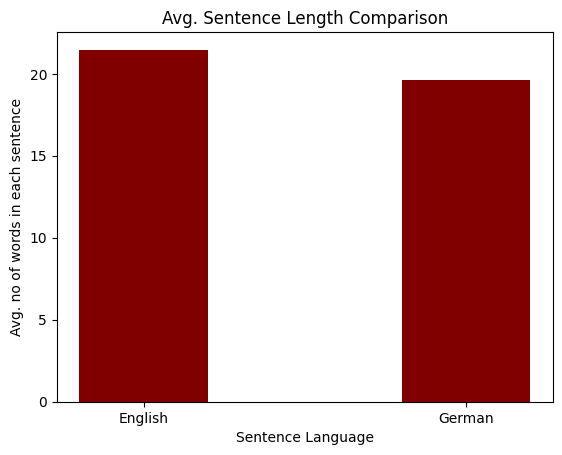

In [36]:
sentence_language = ['English', 'German']
mean_sentence_length = [common_crawl_data['english_sentence_length'].mean(), common_crawl_data['german_sentence_length'].mean()]

plt.bar(sentence_language, mean_sentence_length, color ='maroon',
        width = 0.4)
 
plt.xlabel("Sentence Language")
plt.ylabel("Avg. no of words in each sentence")
plt.title("Avg. Sentence Length Comparison")
plt.show()

<Axes: >

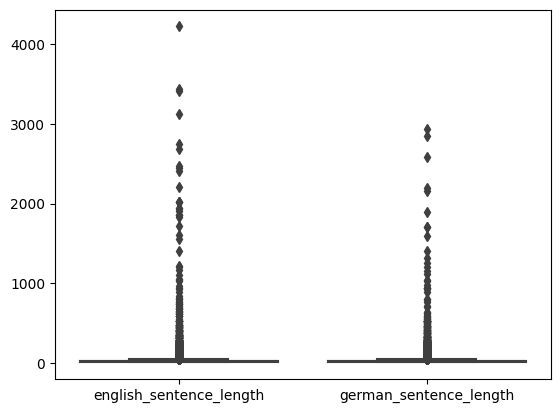

In [37]:
# Word Count Distribution of each sentence

import seaborn as sns
sns.boxplot(data=common_crawl_data[['english_sentence_length', 'german_sentence_length']])

In [38]:
europarl_lines.head(2)

,index,German_Text,English_Text,english_sentence_length,german_sentence_length
0,0,Wiederaufnahme der Sitzungsperiode,Resumption of the session,4,3
1,1,"Ich erkläre die am Freitag, dem 17. Dezember u...",I declare resumed the session of the European ...,38,29
